In [ ]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2

model = load_model("groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")
IMAGE_PATH = ".asset/cat_dog.jpeg"
TEXT_PROMPT = "chair . person . dog ."
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
cv2.imwrite("annotated_image.jpg", annotated_frame)

final text_encoder_type: bert-base-uncased


True

: 

In [46]:
import torch
from collections import defaultdict
import numpy as np
import lap
def linear_assignment(cost_matrix, thresh):
    if cost_matrix.size == 0:
        return np.empty((0, 2), dtype=int), np.arange(cost_matrix.shape[0], dtype=int), np.arange(cost_matrix.shape[1], dtype=int)
    matches, unmatched_a, unmatched_b = [], [], []
    cost, x, y = lap.lapjv(cost_matrix, extend_cost=True, cost_limit=thresh)
    print(x,y)
    for ix, mx in enumerate(x):
        if mx >= 0:
            matches.append([ix, mx])
    unmatched_a = np.where(x < 0)[0]
    unmatched_b = np.where(y < 0)[0]
    matches = np.asarray(matches) if len(matches) > 0 else np.empty((0, 2), dtype=np.int64)
    return matches, unmatched_a, unmatched_b

cost_matrix = np.array([[0.8, 0.2, 0.9], [0.4, 0.8, 0.6]])
thresh = 0.1
matches, unmatched_a, unmatched_b = linear_assignment(1-cost_matrix, thresh)
a = np.empty((0, 1))
print(a)
print("matrix:", 1- cost_matrix)
print("Matches:", matches)
print("Unmatched A:", unmatched_a)
print("Unmatched B:", unmatched_b)

[ 2 -1] [-1 -1  0]
[]
matrix: [[0.2 0.8 0.1]
 [0.6 0.2 0.4]]
Matches: [[0 2]]
Unmatched A: [1]
Unmatched B: [0 1]


In [1]:
import torch
import torch.nn as nn

m = nn.Dropout(p=0.5)
input = torch.randn(2, 1)
output = m(input)
print(input.shape)
print(input[:, None].shape)
print(output)
a = [1,2,3,4,5,6]
print(a[4])
print(a[4:5])

torch.Size([2, 1])
torch.Size([2, 1, 1])
tensor([[-1.1251],
        [ 0.0000]])
5
[5]


/home/hhy_2023/anaconda3/envs/pytorch1.13/lib/python3.8/site-packages/tao/toolkit/tao/eval.py:16: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def bb_intersect_union(d, g):
[03/03 20:56:27] root ERROR: Did not merge any categories.


[{'id': 278, 'video': 'train/YFCC100M/v_a556a65c3a85d0de0717b8cef2f219c', '_scale_task_id': '5de7ffe7e08a1c0032df31e1', 'width': 640, 'height': 480, 'file_name': 'train/YFCC100M/v_a556a65c3a85d0de0717b8cef2f219c/frame0661.jpg', 'frame_index': 660, 'license': 0, 'video_id': 7, 'frame_id': 22, 'neg_category_ids': [393, 90, 868], 'not_exhaustive_category_ids': [601]}, {'id': 279, 'video': 'train/YFCC100M/v_a556a65c3a85d0de0717b8cef2f219c', '_scale_task_id': '5de7ffe7e08a1c0032df31e1', 'width': 640, 'height': 480, 'file_name': 'train/YFCC100M/v_a556a65c3a85d0de0717b8cef2f219c/frame0691.jpg', 'frame_index': 690, 'license': 0, 'video_id': 7, 'frame_id': 23, 'neg_category_ids': [393, 90, 868], 'not_exhaustive_category_ids': [601]}, {'id': 280, 'video': 'train/YFCC100M/v_a556a65c3a85d0de0717b8cef2f219c', '_scale_task_id': '5de7ffe7e08a1c0032df31e1', 'width': 640, 'height': 480, 'file_name': 'train/YFCC100M/v_a556a65c3a85d0de0717b8cef2f219c/frame0721.jpg', 'frame_index': 720, 'license': 0, 'vid

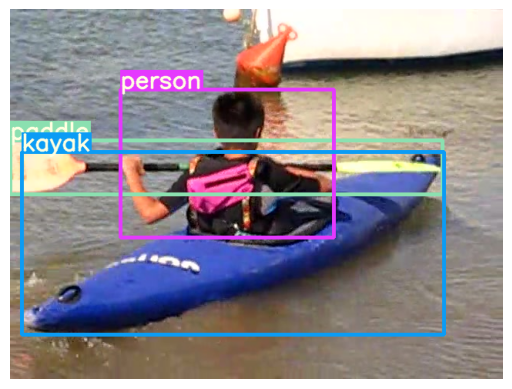

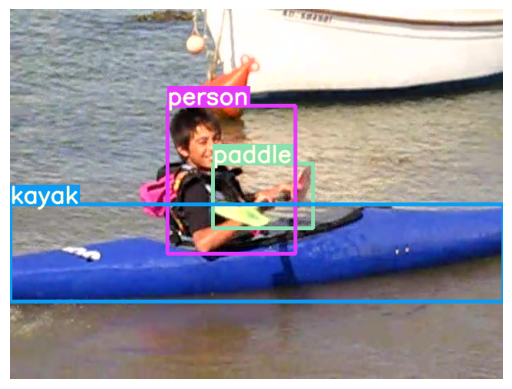

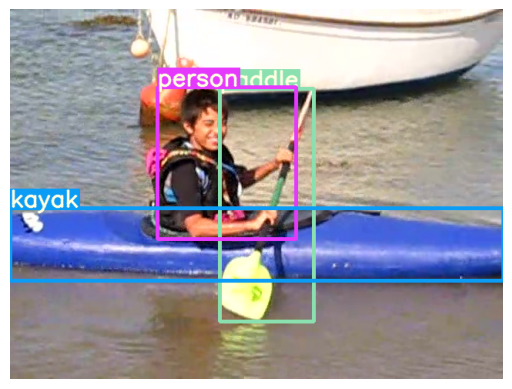

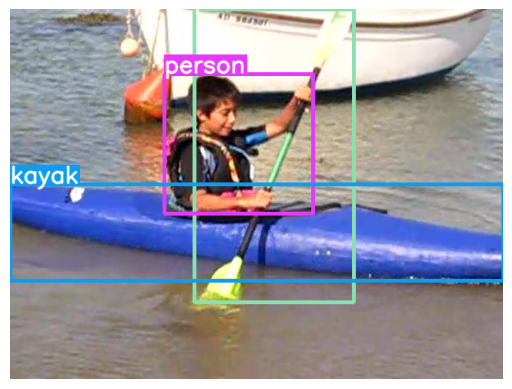

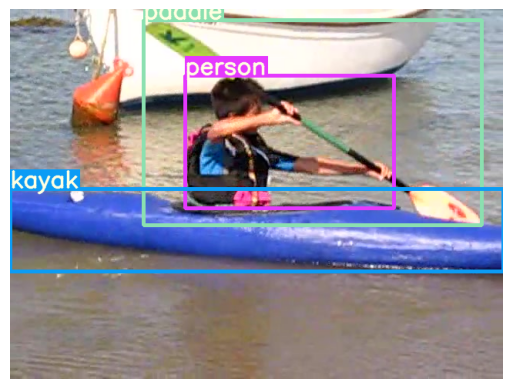

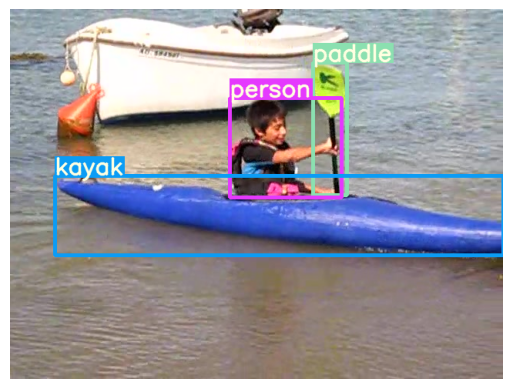

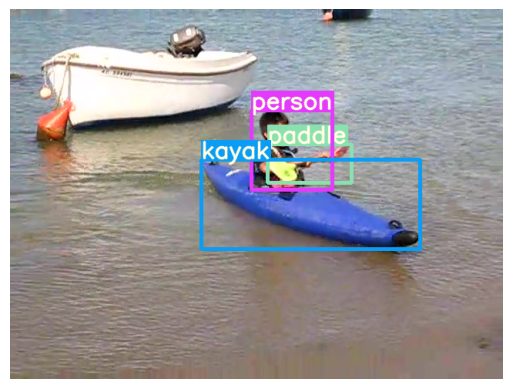

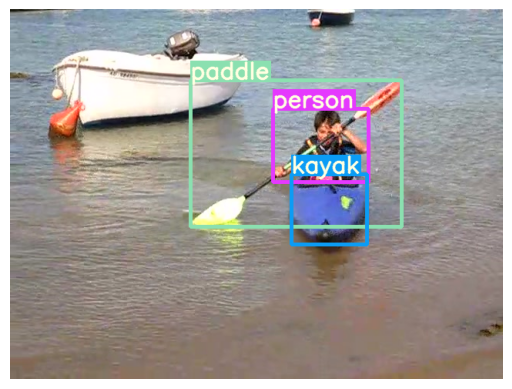

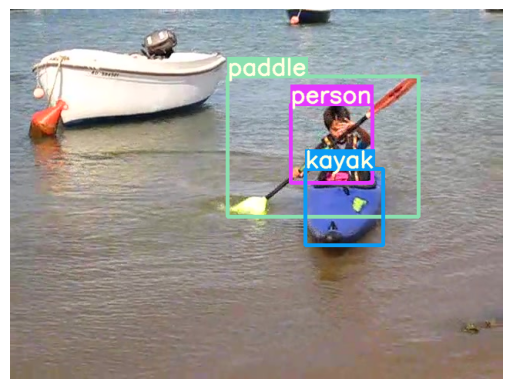

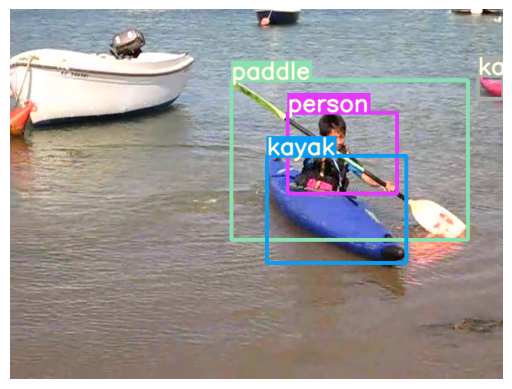

In [1]:
import torch
import os.path as osp
import numpy as np
from PIL import Image
from collections import defaultdict
import matplotlib.pyplot as plt
from groundingdino.util import box_ops, get_tokenlizer
from tao.toolkit.tao import Tao
import cv2



def plot_bbox(img, bbox, label, track_id):
    tl = 3
    np.random.seed(track_id)
    color = tuple(np.random.randint(0, 255, size=3).tolist())
    bbox[2] += bbox[0]
    bbox[3] += bbox[1]
    c1, c2 = (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1)  # filled
        cv2.putText(img,
                    label, (c1[0], c1[1] - 2),
                    0,
                    tl / 3, [225, 255, 255],
                    thickness=tf,
                    lineType=cv2.LINE_AA)
    return img

ann_path = '/data/fzm_2022/Datasets/TAO/annotations/train_ours_v1.json'
tao = Tao(ann_path)
imgid_list = tao.get_img_ids()
vidid_list = tao.get_vid_ids()
idx = 55
img_ids = [278, 279, 280, 281, 282, 283, 284, 285, 286, 287]
img_info = tao.load_imgs(img_ids)
print(img_info)
targets = [tao.img_ann_map[img_id] for img_id in img_ids]
print(targets)
category_dict = tao.cats
cat_list = [item['name'] for item in category_dict.values()]
# print(cat_list[643])
no_l = img_info[0]['not_exhaustive_category_ids']
no_cat = [cat_list[item-1] for item in no_l]
img_paths = [osp.join('/data/fzm_2022/Datasets/TAO/frames',img_info[i]['file_name']) for i in range(len(img_info))]
for i,img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    w, h = img.shape[1], img.shape[0]
    cat_dic = defaultdict(list)
    for item in targets[i]:
        cat_dic[cat_list[item['category_id']-1]].append(item['bbox'])
        plot_bbox(img, item['bbox'], cat_list[item['category_id']-1], item['track_id'])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# print(img_path)
# cat_list = cat_dic.keys()
# caption = " . ".join(cat_list) + ' .'
# print(caption)


##### AED测试格式
``` txt
[
    {
        "image_id": 80,
        "category_id": 644,
        "bbox": [
            0.0,
            374.5414733886719,
            155.56817626953125,
            105.45281982421875
        ],
        "score": 0.85207200050354,
        "track_id": 0,
        "video_id": 2,
        "is_new": true
    },
]
```

In [30]:
from groundingdino.util import box_ops, get_tokenlizer
text_encoder_type="bert-base-uncased"
tokenizer = get_tokenlizer.get_tokenlizer(text_encoder_type)
caption = 'person . iPad .'
tokenized = tokenizer(caption, padding="longest", return_tensors="pt")
beg = tokenized.char_to_token(15)
print(beg)
print(tokenized)

final text_encoder_type: bert-base-uncased
None
{'input_ids': tensor([[  101,  2711,  1012, 25249,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [20]:
from tao.toolkit.tao import Tao

ann_path = '/data/fzm_2022/Datasets/TAO/annotations/train_ours_v1.json/'
# tao = Tao(ann_path)
# vids = tao.vids
# vid_img = tao.vid_img_map
# print(len(vid_img[0]))

ann_str = ann_path.split(' ')
print(ann_str)


['/data/fzm_2022/Datasets/TAO/annotations/train_ours_v1.json/']


In [4]:
import random


cat_cl_names = {'person': 1, 'dog_tt':2, 'cat_aa(de)':5}

def build_captions_and_token_span(cat_dict, force_lowercase):

    cat2tokenspan = {}
    captions = ""
    cat_list = list(cat_dict.keys())
    
    for catname in cat_list:
        if force_lowercase:
            catname = catname.lower()

        tokens_positive_i = []
        subnamelist = [i.strip() for i in catname.split("(")[0].replace("_", " ").split(" ")]
        for subname in subnamelist:
            if len(subname) == 0:
                continue
            if len(captions) > 0:
                captions = captions + " "
            strat_idx = len(captions)
            end_idx = strat_idx + len(subname)
            tokens_positive_i.append([strat_idx, end_idx])
            captions = captions + subname

        if len(tokens_positive_i) > 0:
            captions = captions + " ."
            cat2tokenspan[catname] = tokens_positive_i

    return captions, cat2tokenspan

captions, cat2tokenspan = build_captions_and_token_span(cat_cl_names, force_lowercase=True)
print(captions)
print(cat2tokenspan.values())

person . dog tt . cat aa .
dict_values([[[0, 6]], [[9, 12], [13, 15]], [[18, 21], [22, 24]]])


In [ ]:
class A():
    def __init__(self,a):
        self.a = a